In [35]:
import os
import pandas as pd
import numpy as np
import pathlib
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

print("Done")


Done


In [36]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\himek\\Desktop\\tff\\CNN'

In [37]:
os.path.join(current_dir, 'Dataset')

'c:\\Users\\himek\\Desktop\\tff\\CNN\\Dataset'

In [38]:
print("Total no of cat images",len(os.listdir(os.path.join(current_dir, 'Dataset',"images","cats"))))

Total no of cat images 279


In [39]:
image_path = os.path.join(current_dir, 'Dataset',"images")
image_path

'c:\\Users\\himek\\Desktop\\tff\\CNN\\Dataset\\images'

In [40]:
os.listdir(image_path)

['cats', 'dogs']

In [41]:
path_dict = {"cats":[],"dogs":[]}
for dir in os.listdir(image_path):
    directory = os.path.join(image_path, dir)
    for img in os.listdir(directory):
        path_dict[dir].append(os.path.join(directory, img))

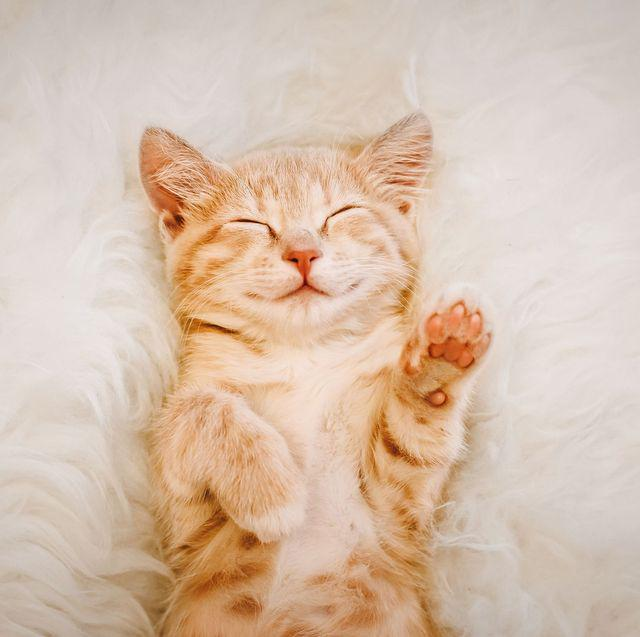

In [59]:
cat_image_demo = Image.open(path_dict["cats"][15])
cat_image_demo

In [43]:

labels = {"cats": 0, "dogs": 1}

x, y = [], []

for key, value in path_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        re_img = cv2.resize(img, (240, 240))
        x.append(re_img)
        y.append(labels[key])

In [44]:
x = np.array(x)
y = np.array(y)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0)

In [46]:
x_train_scaled = x_train / 279
x_test_scaled = x_test / 279

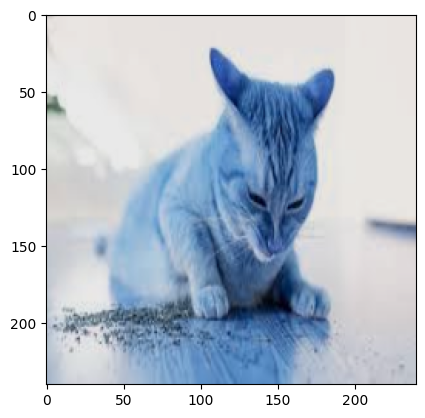

In [47]:
plt.imshow(x_train_scaled[15])
plt.show()

In [49]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    # Replace cat_image_demo with the number of output classes (e.g., 2 for cats and dogs)
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,901,570 (49.22 MB)

 Trainable params: 12,901,570 (49.22 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(x_train_scaled,
                     y_train,
                     epochs=10,
                     validation_split=0.2)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step - accuracy: 0.8551 - loss: 0.3684 - val_accuracy: 0.6190 - val_loss: 0.7443
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 428ms/step - accuracy: 0.9144 - loss: 0.2440 - val_accuracy: 0.6548 - val_loss: 0.8788
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.9020 - loss: 0.2428 - val_accuracy: 0.6548 - val_loss: 0.7969
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step - accuracy: 0.9292 - loss: 0.1765 - val_accuracy: 0.6667 - val_loss: 1.1269
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 505ms/step - accuracy: 0.9830 - loss: 0.0922 - val_accuracy: 0.6310 - val_loss: 1.6589
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 502ms/step - accuracy: 0.9951 - loss: 0.0350 - val_accuracy: 0.6429 - val_loss: 1.1988
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 496ms/step - accuracy: 0.9971 - loss: 0.0448 - val_accuracy: 0.5952 - val_loss: 1.5195
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 493ms/step - accuracy: 0.9961 - loss: 0.0145 - val_accuracy: 0.